In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events)
- Look at some examples

In [2]:
data = pd.read_csv('../../assets/datasets/train.tsv', sep='\t', na_values={'is_news' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [3]:
data[['title', 'label']].head()

,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


#### Does being a news site effect green-ness?

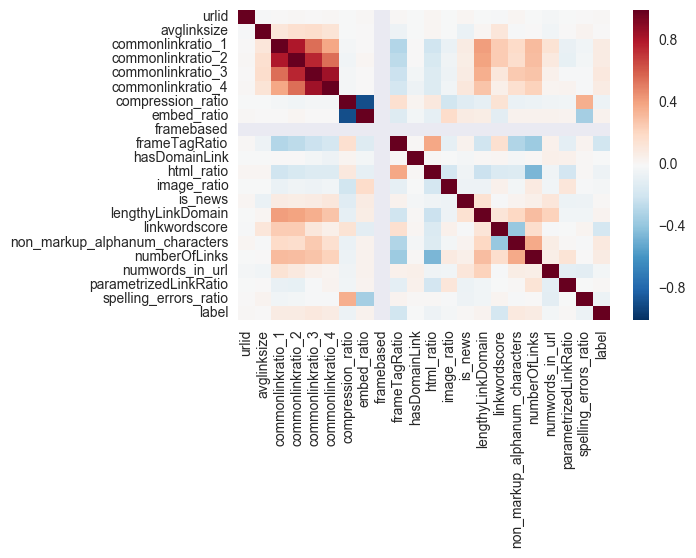

In [11]:
# TODO
sns.heatmap(data.corr())

#### Does the website category effect green-ness?

In [13]:
# TODO
data.corr()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
urlid,1.000000,-0.011162,0.002856,0.008407,0.005285,0.009573,-0.007343,0.013340,NaN,0.010065,-0.005802,0.016989,-0.000590,0.016746,-0.007780,-0.013668,0.016732,-0.002019,-0.017342,-0.005868,0.002292,0.013450
avglinksize,-0.011162,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,NaN,-0.049270,-0.002046,0.018974,-0.003002,-0.064014,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.002856,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,NaN,-0.294860,0.006790,-0.201501,-0.064435,0.082044,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.008407,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,NaN,-0.259222,0.000263,-0.159702,-0.044663,0.076389,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.005285,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,NaN,-0.218559,-0.031097,-0.133370,-0.050357,0.082562,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.009573,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,NaN,-0.178064,-0.052519,-0.136561,-0.038071,0.112934,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.007343,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,NaN,0.159335,0.027657,0.106335,-0.188976,-0.122866,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.013340,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,NaN,-0.130753,-0.026473,-0.090938,0.183808,0.083488,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
framebased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frameTagRatio,0.010065,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,NaN,1.000000,0.010193,0.384937,-0.088847,0.040760,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762


#### Does the image ratio effect green-ness?

In [6]:
# TODO

#### Fit a logistic regression model using statsmodels
- Test different features that may be valuable
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [14]:
# TODO
import statsmodels.formula.api as sm
import pandas as pd

model = sm.logit("label ~ is_news + avglinksize + commonlinkratio_1",data = data).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.689299
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7391
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Nov 2016   Pseudo R-squ.:                0.005043
Time:                        09:58:34   Log-Likelihood:                -5097.4
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 3.525e-11
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.3370      0.064     -5.256      0.000        -0.463    -0.211
is_news               0.0082      0.048      0.171      0.865        -0.086     0.103
avglinksize          -0.0009      0.003     -0.322      0.748        -0.006     0.004
commonlinkratio_1     0.8285      0.117      7.091      0.000         0.600     1.058
=====================================================================================
"""

#### Fit a logistic regression model using statsmodels with text features
- Add text features that may be useful, add this to the model and see if they improve the fit
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [9]:
# EXAMPLE text feature 'recipe'
data['is_recipe'] = data['title'].fillna('').str.contains('recipe')